In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import os
os.chdir(r"D:\Git_repos\OpenCV_tutorial\My_assignments\Exc_17")

In [2]:
prototxt = "./colorization_deploy_v2.prototxt.txt"
caffe_model = "./colorization_release_v2.caffemodel"
pts_npy = "./pts_in_hull.npy"

In [3]:
net = cv2.dnn.readNetFromCaffe(prototxt,caffe_model)
pts = np.load(pts_npy)

In [4]:
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

55
53


In [5]:
def colorize(images_paths, net):
    for img_path in images_paths:
        test_image = cv2.imread(img_path)
        test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)

        normalized= test_image.astype("float32") / 255.0
        lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)
        resized = cv2.resize(lab_image, (224, 224))
        L = cv2.split(resized)[0]
        L -= 50 

        net.setInput(cv2.dnn.blobFromImage(L))
        ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
        ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

        L = cv2.split(lab_image)[0]
        LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
        
        RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)
        RGB_colored = np.clip(RGB_colored, 0, 1)
        RGB_colored = (255 * RGB_colored).astype("uint8")

        plt.imshow(RGB_colored)
        plt.title('Colored Image')
        plt.show()


In [6]:
def list_images_in_folder(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    image_list = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):
            full_path = os.path.join(folder_path, filename)
            image_list.append(full_path)
    
    return image_list

In [17]:
folder_path = r"D:\Git_repos\OpenCV_tutorial\My_assignments\Exc_17\grayscale_images"
images_paths = list_images_in_folder(folder_path)
images_paths

['D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\4d76d88e-8912-42b8-a355-c390249b6fd4.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\bird.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\cat.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\cat_2.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\desert.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\eagle.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\Einstein_1939.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\flower.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\iphone-14-pro-01.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_images\\kids.jpg',
 'D:\\Git_repos\\OpenCV_tutorial\\My_assignments\\Exc_17\\grayscale_imag

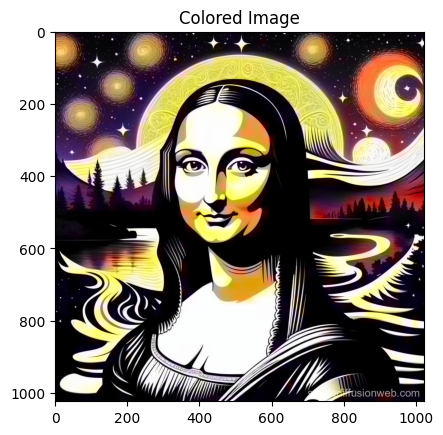

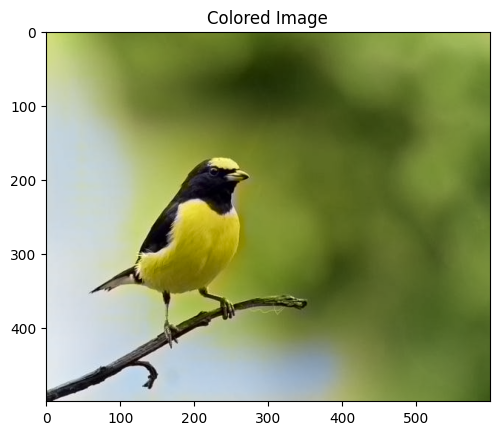

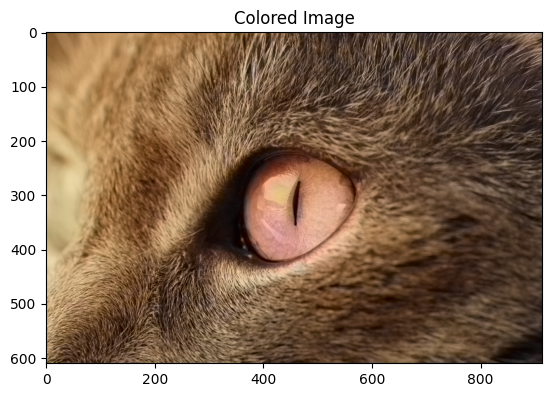

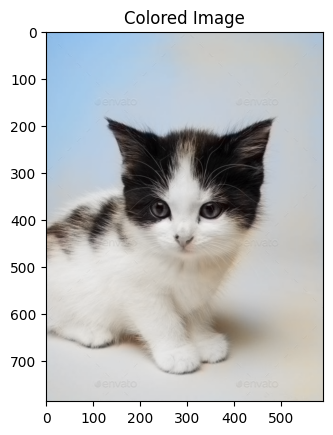

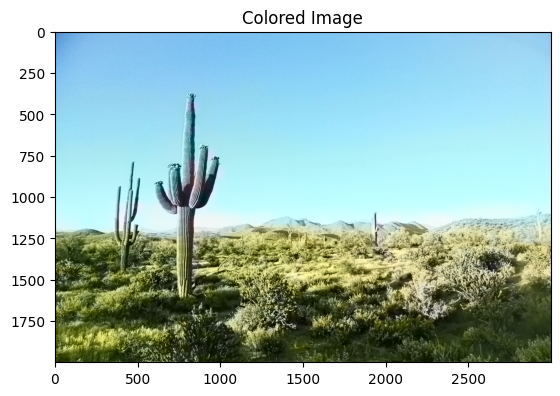

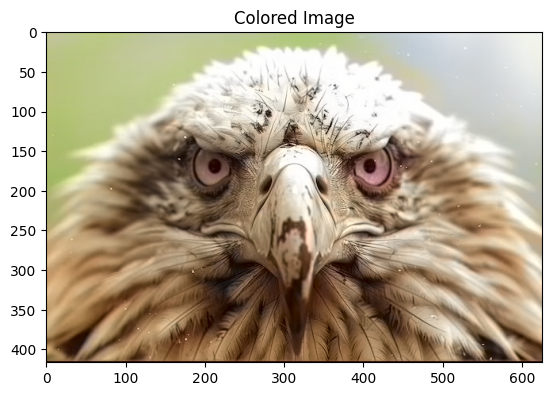

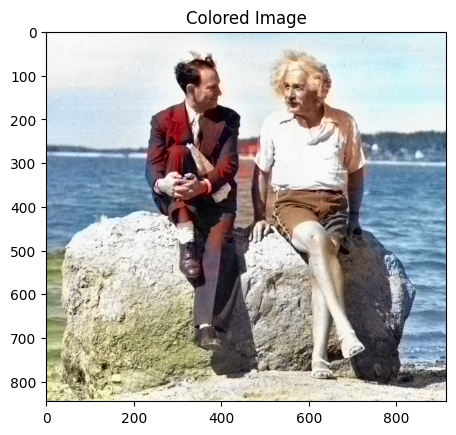

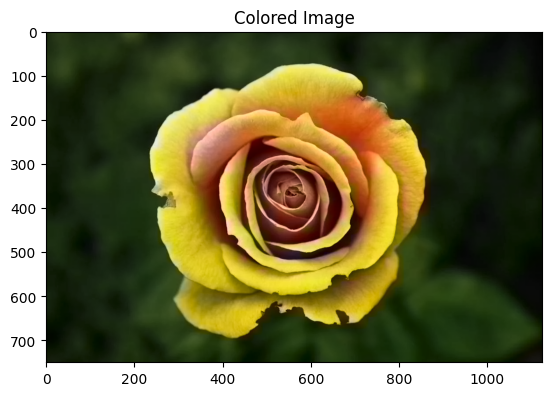

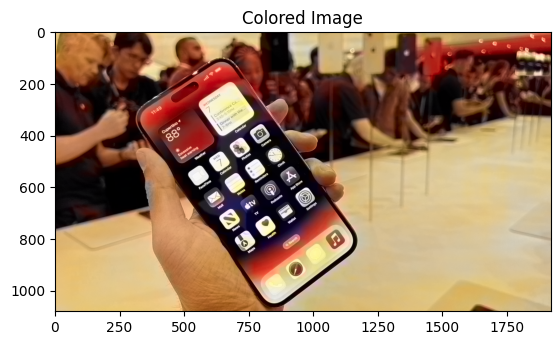

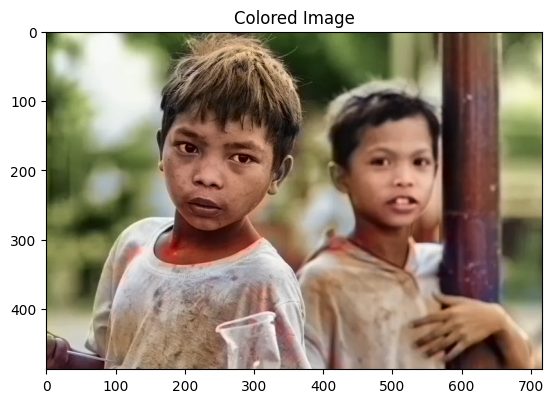

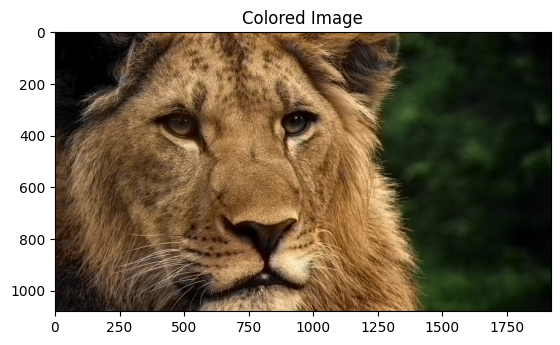

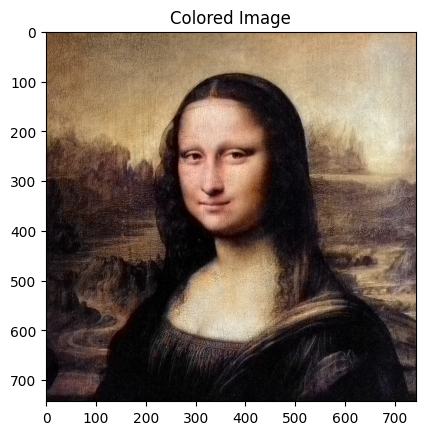

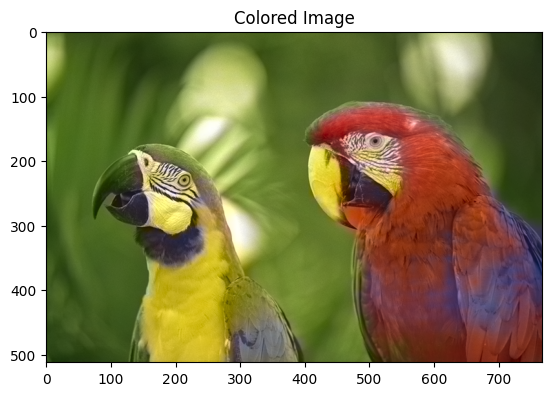

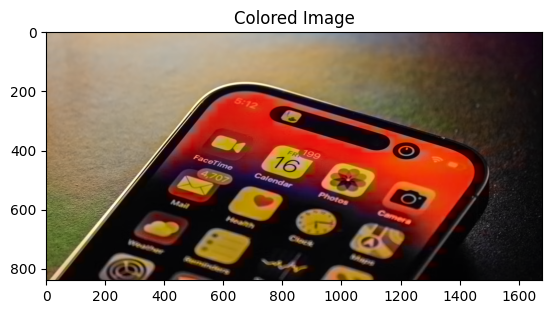

In [18]:
colorize(images_paths, net)